<a href="https://colab.research.google.com/github/jacekwachowiak/UCA-image-processing/blob/master/Tp_Data_enhancement.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Data Enhancement 
                                    TP Introduction
                                    abechens@unice.fr
                                    19/09-2019

Un compte rendu en binome est a rendre par mail au plus tard 25/09.

## Introduction: 
On peut definir une image comme une fonction 2D (image monochrome) de l'intensite lumineuse, $u(x,y)$, en fonction de la localisation spatial ($x$ et $y$ sont les coordonnnees spatiales).

Une image numeriqe est une image dont le domaine spatial et la luminosite ont ete discretises. ON peut la representer par une matrice 2D. Chaque element de la matrice est un pixel, represente par ses coordonnees $(i,j)$ et sa valeur $v=p(i,j)$ communement appelee niveau de gris. Les images sont le plus souvent codees en 256 niveaux de gris (codage sur 8 bits). C'est ce qu'on appelle la dynamique de l'image. 


In [0]:
# Fonctions et imports utiles
import matplotlib.pyplot as plt
import numpy as np
import scipy.ndimage
from scipy.ndimage.filters import median_filter

La fonction imread de pyplot permet de charger le contenu d'une image et reconnait la plupart des formats de fichiers utilises en traitement d'images.


1. Importer et afficher l'image de Lena avec pyplot. Voir l'impact de vmin et vmax.

[[159 158 153 ... 166 167 133]
 [159 158 153 ... 166 167 133]
 [159 154 153 ... 151 141 103]
 ...
 [ 40  40  43 ...  70  79  81]
 [ 33  40  40 ...  86  89  89]
 [ 33  40  42 ...  89  90  97]]


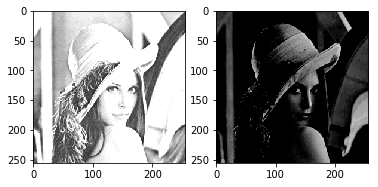

In [2]:
## Insert code here
img = plt.imread("lena.bmp")
print(img)
# plt.imshow(img)
fig=plt.figure()
fig.add_subplot(1,2,1)
plt.imshow(img, vmax=128, vmin=0, cmap='gray')
fig.add_subplot(1,2,2)
plt.imshow(img, vmax=255, vmin=128, cmap='gray')

<BarContainer object of 256 artists>

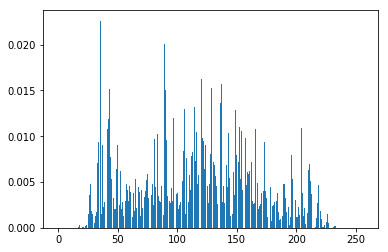

In [3]:
#since it's used to check the image already, the histogram func is copied here
def histogram(u):
    u=u.astype(int)
    histog=np.zeros(256)
    for i in range(256):
        histog[i]=sum(sum(u==i))
    histog=histog/len(u)**2
    return histog
#

axis = np.arange(256)
imgh=histogram(img)
plt.bar(axis, imgh)

In [0]:
#Comments
#By manipulating 'vmax' and 'vmin' we can already see the image changing the colormap base, in our case since the picture is in gray scale,
#the visual effect is a change of the brightness.
#The default values are 0-255.

## Histogram
L'historgramme d'une image permet de representer la densite de probabilite des pixels au sein de cette image. 

Soit $h_u(v)$ la fonction egale au nombre de pixels d'intensite v au sein de l'image u, alors on peut definir la densite de probabilite $P_u(v)$ par: 
$$
P_u(v)=\frac{h_u(v)}{n_cn_l}
$$

En modifiant cette densite de probabilite, on joue sur les caracteristiques de l'image. On peut, par exemple, reakuser des operations de type rehaussement de contraste via des transformations d'historgrammes. 

In [0]:
def histogram(u):
    u=u.astype(int)
    histog=np.zeros(256)
    for i in range(256):
        histog[i]=sum(sum(u==i))
    histog=histog/len(u)**2
    return histog

## Transformations simples
Un algorihtme de transformation d'histogramme a l'allure suivante:
- Pour chaque pixel $p$ de l'image, lire son intensite $v$.
- Remplacer $v$ par $T(v)$.
    
La fonction $T$ est appelee transformation d'histogramme.
1. Transformez l'histogramme de l'image Lena en utilisant les fontions T suivant:
$$
T(v)= \begin{cases}
255 \text{ si } v>128\\
0 \text{ sinon }
\end{cases}
$$

$$
T(v)=255-v
$$



<BarContainer object of 256 artists>

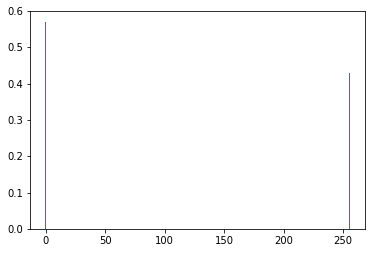

In [6]:
#Transformation 1 + Histogramme
img1=np.zeros(img.shape)
img1[img>128]=255
img1h = histogram(img1)
img1h
axis = np.arange(256)
plt.bar(axis, img1h)

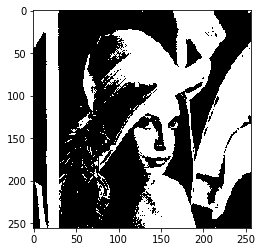

In [7]:
plt.imshow(img1, cmap='gray')

<BarContainer object of 256 artists>

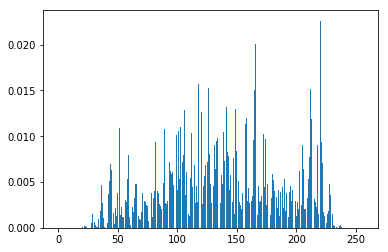

In [8]:
#Transformation 2 + Histogramme
img2=np.zeros(img.shape)
img2=255-img
img2h = histogram(img2)
# plt.hist(img2h)
axis = np.arange(256)
plt.bar(axis, img2h)

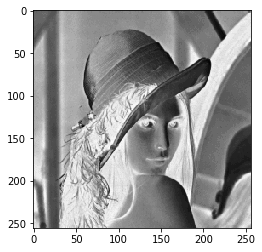

In [9]:
plt.imshow(img2, cmap='gray')

2. Observez les images transformees et essayez de nommer chaque transformation

 Reponse ici

In [0]:
#Comment
#The first transformation converts the image to monochrome - black/white only while the 2nd one is an inversion of the image.
#The histogram comparison confirms that the bars are directly opposite for the inversion and there are only 2 of them in the monochrome.

## Amelioration de la dynamique
1. Affichez limage Clown


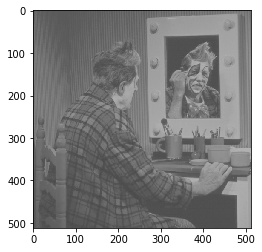

In [11]:
#Code here to  CLOWN_LUMI2.BMP
## Insert code here
clown = plt.imread("CLOWN_LUMI2.BMP")
# print(clown)
plt.imshow(clown, cmap='gray', vmin=0, vmax=255)

In [12]:
print(clown.max())
print(clown.min())

179
73


On visualise clairement que la dynamique de l'image Clown  m'est pas tres importante. Or, plus la dynamique est etalee et meilleure est la qualite de l'image.

1. En definissant $a$ et $b$ comme les limites respectivement inferieure et superieure de l'histogramme de l'image d'entree, ecrivez la fontion $T$ permettant d'utiliser toute la dynamique (de 0 a 255) de l'image.

In [0]:
#Code here
def T(u):
    v=0 #Fill inn here
    v=(u-u.min())/(u.max()-u.min())*255
    return v

2.Appliquez cette transformation sur l'image clown et commentez le resultat. Affichez les histogrammes correspondants. 

255.0
0.0


<BarContainer object of 256 artists>

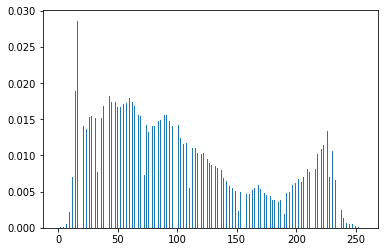

In [14]:
#Code ici
clown2 = T(clown)
print(clown2.max())
print(clown2.min())
clown2h = histogram(clown2)
axis = np.arange(256)
plt.bar(axis, clown2h)

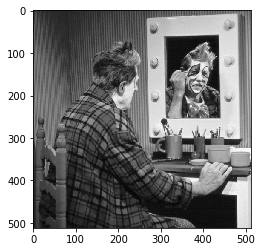

In [15]:
plt.imshow(clown2, cmap='gray', vmin=0, vmax=255)

Commentez ici

In [0]:
#After the changes the min and max values range from 0 to 255 and not from 73 to 179 which makes the pixels spread more uniformly in the range.
#The image has more contrast.

### Histogramme cumule

L'histogramme cumule est un histogramme qui prend en compte tous les pixels dont la valeur est inferieure ou egale au niveau de gris courant. On normalise ce nombre en divisant par le nombre total de pixels.

Son application la plus connue est l'egalisation d'histogramme qui consiste a faire tendre la densite de probabilite des pixels, $P_u(v)$, vers une loi uniforme (on "etale" l'histogramme). Ceci est obtenu via la transformation suivante : 
$$
T(v) = 255H_c(v)
$$
ou $H_c$ est l'histogramme cumule. 

1. Plot l'histogramme cumule de Clown.


In [0]:
#Plot Histogramme cumule
def cumhistogram(h):
    y = np.cumsum(h)
    return y/np.max(y)

<BarContainer object of 256 artists>

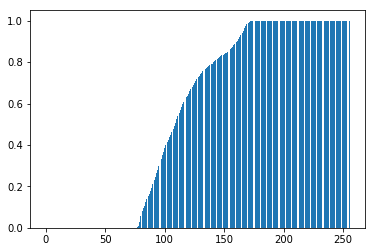

In [18]:
cumh = cumhistogram(histogram(clown))
axis = np.arange(cumh.size)
plt.bar(axis, cumh)

2. Appliquez cette transformation sur l'image precedente et commentez.

<BarContainer object of 256 artists>

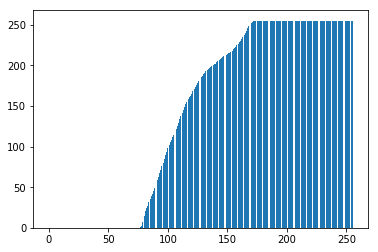

In [19]:
cumh1=255*cumh
plt.bar(axis, cumh1)

3. Verifier l'histogramme cumule de l'image de sortie pour visualiser l'operation d'egalisation.

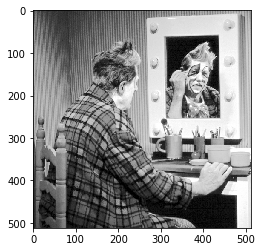

In [20]:
def cum255(image):
    cum_h = cumhistogram(histogram(image))
    return np.array([255*cum_h[val] for val in image])

cum255_img = cum255(clown)
plt.imshow(cum255_img, cmap='gray', vmin=0, vmax=255)

<BarContainer object of 256 artists>

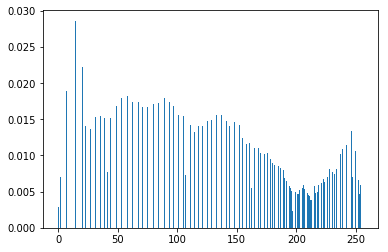

In [21]:
plt.bar(axis, histogram(cum255_img))

# Filtrage
## Definitions
Le filtrage est une operation souvent utilisee en traitement d'images permettant par exemple de reduire le bruit contenu dans l'image. Ce filtrage peut etre lineaire ou non-lineaire. 

Dans le cas d'un filtre lineaire, l'operation de filtrage peut etre realisee au moyen d'un produit de convolution. Soit $h$ le filtre ou masque de convolution, l'operation de convolution $$
w=u*h
$$
est definie en discret par :
$$
w(i,j)=\sum_{n=1}^{n_l}\sum_{m=1}^{n_c} u(n,m)h(i-n,j-m)
$$
on  considere ici que $h$ est periodisee en dehors de $\{1,..., n_l\} \times \{1,...,n_c\}$.

La fonction scipy.ndimage.correlate(u,h,mode) permet de réaliser l'opération de filtrage de l'image $u$ par le maque de convolution $h$. 

Le filtrage non linéaire le plus utilisé est le filtre médian. Ce filtre remplace la valeur d'un pixel par la médiane des valuers de ses voisins. Ce filtrage consiste à: 
- Chercher et à ordonner les valeurs des voisins du pixel courant v (suivant un masque d'une taille de $K \times K$).
- Selectionner la valeur située sur la médiane et remplacer $v$ par cette valeur. 

## Applications
1. Définissez les deux masques de convolution suivants : 
$$
h_1=\frac{1}{9} \left[\begin{matrix}
1 & 1 & 1 \\
1 & 1 & 1\\
1 & 1 & 1
\end{matrix}\right] \quad h_2= \left[\begin{matrix}
0 & 1 & 0 \\
1 & -4 & 1\\
0 & 1 & 0
\end{matrix}\right]
$$

In [22]:
h1=np.ones((3,3))/9
h1
h2=[[0,1,0],[1,-4,1],[0,1,0]]
h2

[[0, 1, 0], [1, -4, 1], [0, 1, 0]]

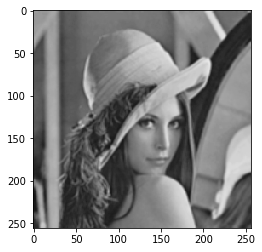

In [23]:
img3 = scipy.ndimage.correlate(img,h1)
plt.imshow(img3, cmap='gray', vmin=0, vmax=255)

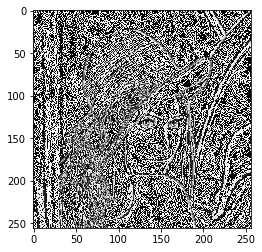

In [24]:
imgn2 = scipy.ndimage.correlate(img,h2)
plt.imshow(imgn2, cmap='gray', vmin=0, vmax=255)

2. Commentez l'image filtrée par ces masques de convolutions. L'image de départ peut être l'image de Lena.


In [0]:
#By applying the masks we see that we can blur the image, by default with a matrix of ones divided by the number of elements (3x3 in the example).
#The second case is edge detection with a 3x3 kernel.

Une des applications où le filtrage est très utilisé est  l'atténuation de bruit. Le bruit est une altération de l'image : Toute l'information pertinente dans l'image n'est pas simplement accessible. Le filtrage consiste donc à retrouver le maximum d'information dans l'image bruitée. Certains filtres sont a pr´coniser selon le type de bruit. 
4. Chargez l'image Lena et bruitez-la en rajoutant une bruit additif et aléatiore suivant une distribution gaussienne de moyenne nulle et d'écart-type 20. ( Utilsez le fonction np.random.normal)

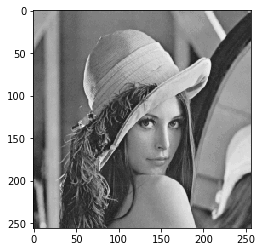

In [26]:
imgn = img+np.random.normal(loc=0.0, scale=20.0)
# print(imgn[0:1][0:1]-img[0:1][0:1])
plt.imshow(imgn, cmap='gray', vmin=0, vmax=255)

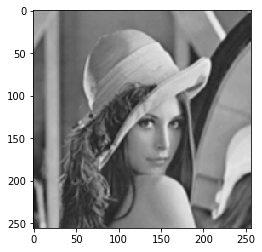

In [27]:
imgn1 = scipy.ndimage.correlate(imgn,h1)
plt.imshow(imgn1, cmap='gray', vmin=0, vmax=255)

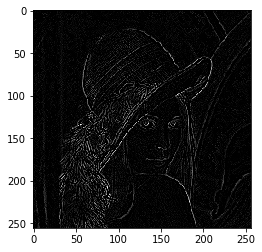

In [28]:
imgn2 = scipy.ndimage.correlate(imgn,h2)
plt.imshow(imgn2, cmap='gray', vmin=0, vmax=255)

5. Observez l'image en sortie du filtre moyenneur et du filtre median puis commentez.

In [0]:
#After applying the mean filter and edge detection it's visible that many patterns were found, 
#the face is still recognizable but the image seems too noisy
#Applying Gaussian noise made the image much sharper and after filtering thorugh the edge detection, the image outlines well the silhouette.

6. Procédez de la même facon en bruitant l'image avec du bruit "poivre et sel" (probabilité 10%) à l'aide la fonction salt_and_pepper)

In [0]:
def salt_and_pepper(image,amount):
    row,col= image.shape
    s_vs_p = 0.5
    out = np.copy(image)
    
    # Salt mode
    num_salt = np.ceil(amount * image.size * s_vs_p)
    coords1 = [np.random.randint(0, i - 1, int(num_salt)) for i in image.shape]
    out[tuple(coords1)] = 255
    print(coords1)
    # Pepper mode
    num_pepper = np.ceil(amount* image.size * (1. - s_vs_p))
    coords2 = [np.random.randint(0, i - 1, int(num_pepper)) for i in image.shape]
    out[tuple(coords2)] = 0
    print(coords2)
    return out



In [31]:
imgs = salt_and_pepper(img, 0.1)

[array([ 74,  28, 141, ..., 187,  34, 161]), array([146,  93, 238, ..., 173, 230, 122])]
[array([ 60, 233,  96, ..., 111,  39, 217]), array([ 74,  15,  12, ..., 214,  22, 182])]


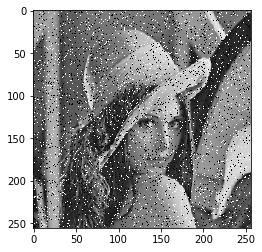

In [32]:
plt.imshow(imgs, cmap='gray', vmin=0, vmax=255)

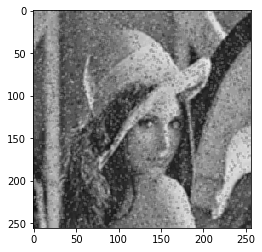

In [33]:
imgs1 = scipy.ndimage.correlate(imgs,h1)
plt.imshow(imgs1, cmap='gray', vmin=0, vmax=255)

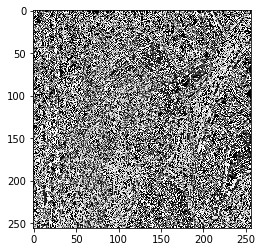

In [34]:
imgs2 = scipy.ndimage.correlate(imgs,h2)
plt.imshow(imgs2, cmap='gray', vmin=0, vmax=255)

7. Commentez

In [0]:
#Adding 10% of salt and pepper we can see a significant amount of white and black pixels out of place, 
#which is reduced by the blur kernel at the cost of image sharpness.
#The output of the edge detection seems useless, which suggest that the processing done is not enough or the picture is too noisy already. 

# Transformée de Fourier
## Définitions
La transformée de Fourier permet de représenter une information temporelle (spatiale en 2D) en une information fréquentielle. La transformation de Fourier 2D discrète s'écrit : 
$$
\hat{u} (v,w) = \frac{1}{n_l n_c} \sum_{n=0}^{n_l-1}\sum_{m=0}^{n_c-1} u(n,m)\exp^{-j2\pi\left(\frac{vn}{n_c}+\frac{wm}{n_l}\right)}
$$
On représente habituellement le logarithme (pour accentuer le contraste) du module de la tranformée de Fourier "recentrée" à l'aide de la fonction np.fft.fftshift.

Calculez la tranformée de Fourier (np.fft.fft2) de l'image Lena et affichez son module.

In [0]:
img = plt.imread("lena.bmp")

In [0]:
imgf = np.fft.fft2(img)

In [0]:
imgff = np.fft.fftshift(imgf)

In [0]:
imglog = np.log(imgff)

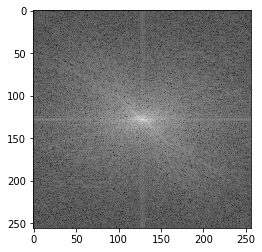

In [40]:
plt.imshow(abs(imglog), cmap='gray')

#### 4.2 Filtrage fréquentiel
Nous allons réaliser comme précédemment une opération de filtrage mais dans le domaine fréquentiel cette fois-ci. Ceci s'effectie en 3 étapes. 
1. Calcul des transfomees de Fourier de l'image $u$ et du filtre $h$.
2. Multiplication terme à terme dans le domaine fréquentiel. 
3. Transformée inverse.

Créez un masque carré $h$, ne contenant que des 1, de taille $5 \times 5$. Normalisez ce filtre et calculez et affichez sa transformée de Fourier.

In [0]:
img = plt.imread("lena.bmp")
hh = np.ones((5,5))
hhnorm = hh/25

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: RuntimeWarning: divide by zero encountered in log
  This is separate from the ipykernel package so we can avoid doing imports until


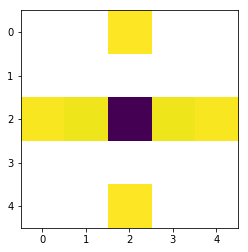

In [57]:
hhf = np.fft.fft2(hhnorm)
hhshift = np.fft.fftshift(hhf)
hhlog = np.log(hhshift)
plt.imshow(abs(hhlog))

Quel est ce type de filtre ?

In [0]:
#The matrix suggest this is a mean filter (just the size is 5x5)

Réalisez le filtrage comme décrit ci-dessus. 

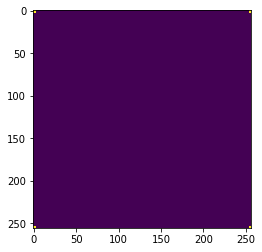

In [65]:
padding = (img.shape[0] -  hh.shape[0], img.shape[1] - hh.shape[1])
padded = np.pad(hhnorm, (((padding[0]+1)//2, padding[0]//2), ((padding[1]+1)//2, padding[1]//2)), 'constant')
kernel = np.fft.ifftshift(padded)
plt.imshow(abs(kernel))

Vérifiez le résultat obtenu et commentez.

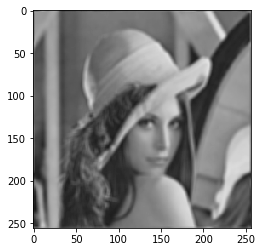

In [64]:
fft_img = np.abs(np.fft.ifft2(np.fft.fft2(img) * np.fft.fft2(kernel)))
plt.imshow(fft_img, cmap='gray', vmin=0, vmax=255)
plt.show()

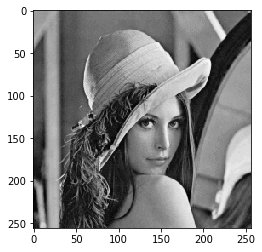

In [62]:
#Pure transformation on unchanged image, the image remains sharp
imgf = np.fft.fft2(img)
final = np.fft.ifft2(imgf)
plt.imshow(abs(final), cmap='gray')

In [0]:
#As expected the image that was combined with the 5x5 ones filter is blurred, while the original is sharp. This confirms that we can encode the image with Fourier transform but also modify it in the frequency domain to receive similar
#resutls as multiplying by masks/filter in the matrix form.